In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the seaborn theme
sns.set_theme(style="ticks")

In [3]:
# import data
df= pd.read_csv('./data/yield_df.csv') 

In [4]:
df.head() # check the first 5 rows

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop(['Unnamed: 0', 'pesticides_tonnes'], axis=1, inplace=True) # drop the unnamed column

In [6]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'avg_temp'],
      dtype='object')

In [7]:
# rename the columns for better understanding
df.rename(columns={'Item':'Crop'}, inplace=True)
df.rename(columns={'Area':'Country'}, inplace=True)
df.rename(columns={'hg/ha_yield':'Yield'}, inplace=True)
df.rename(columns={'average_rain_fall_mm_per_year':'Avg_rainfall'}, inplace=True)

In [8]:
df.shape

(28242, 6)

In [9]:
df.describe().T # check the summary statistics

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.0,1995.0000,2001.00,2008.00,2013.00
Yield,28242.0,77053.332094,84956.612897,50.0,19919.2500,38295.00,104676.75,501412.00
Avg_rainfall,28242.0,1149.055980,709.812150,51.0,593.0000,1083.00,1668.00,3240.00
avg_temp,28242.0,20.542627,6.312051,1.3,16.7025,21.51,26.00,30.65


In [10]:
df.info() # check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       28242 non-null  object 
 1   Crop          28242 non-null  object 
 2   Year          28242 non-null  int64  
 3   Yield         28242 non-null  int64  
 4   Avg_rainfall  28242 non-null  float64
 5   avg_temp      28242 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


In [11]:
df.isnull().sum() # check for missing values

Country         0
Crop            0
Year            0
Yield           0
Avg_rainfall    0
avg_temp        0
dtype: int64

In [12]:
df.describe(include='object') # check the summary statistics for categorical variables

,Country,Crop
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [13]:
df.columns

Index(['Country', 'Crop', 'Year', 'Yield', 'Avg_rainfall', 'avg_temp'], dtype='object')

In [14]:
df.nunique() # check the number of unique values in each column

Country           101
Crop               10
Year               23
Yield           11514
Avg_rainfall      100
avg_temp         1831
dtype: int64

# EDA(explotory data analysis)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Yield'}>],
       [<Axes: title={'center': 'Avg_rainfall'}>,
        <Axes: title={'center': 'avg_temp'}>]], dtype=object)

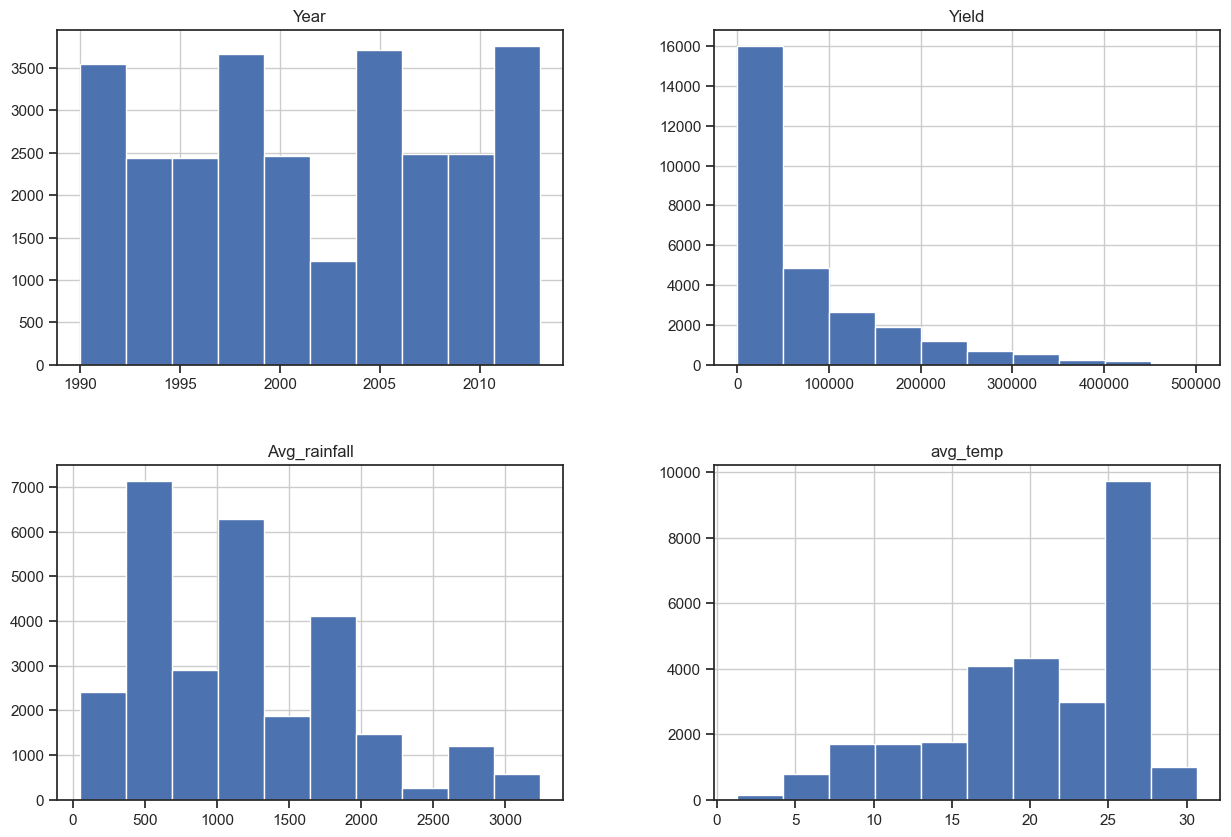

In [15]:
df.hist(figsize=(15,10)) # check the distribution of the numerical values in the dataset

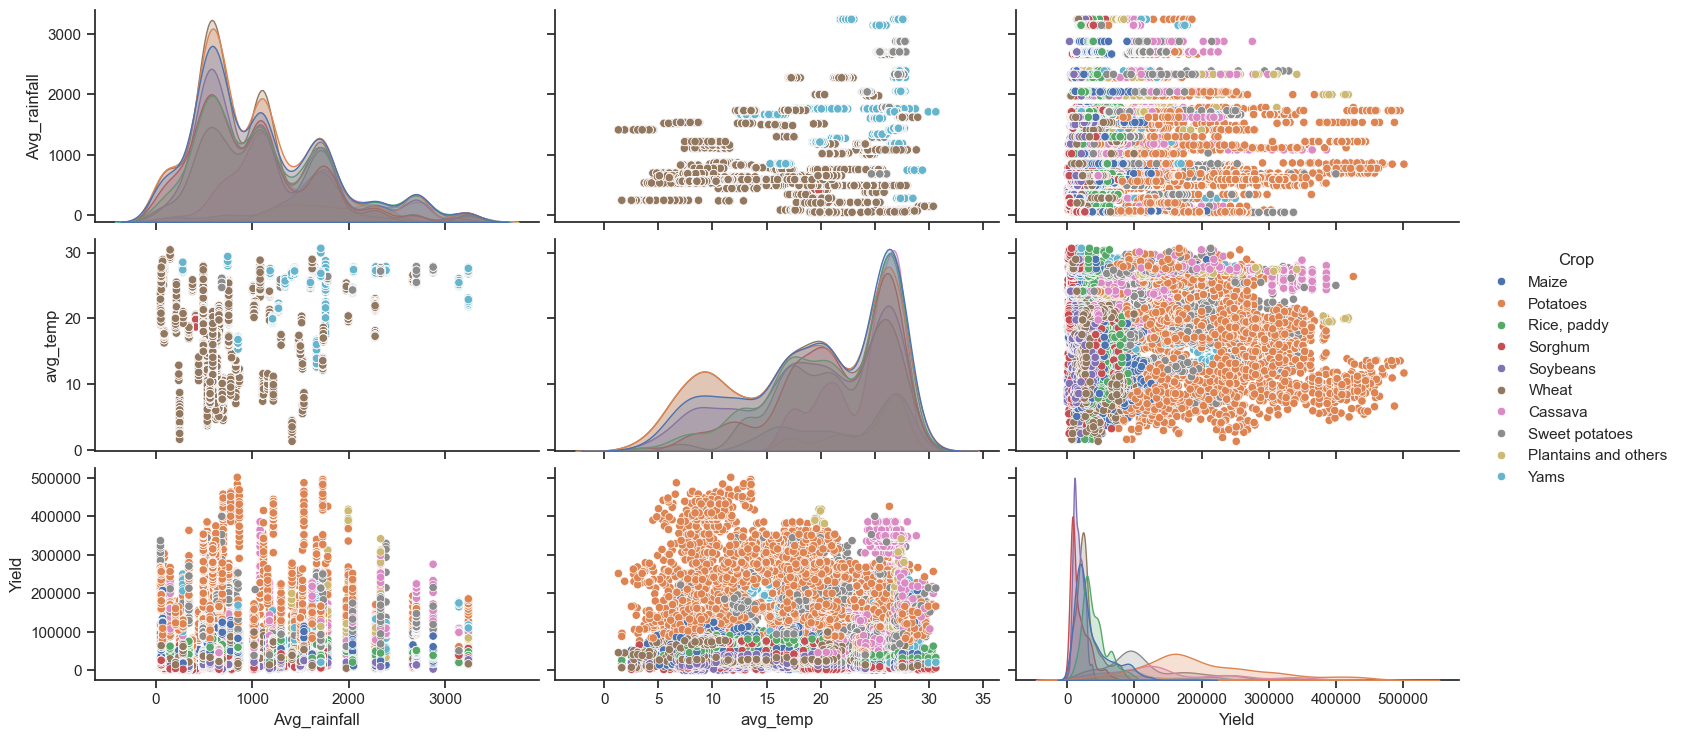

In [16]:
sns.pairplot(df[['Crop', 'Avg_rainfall', 'avg_temp', 'Yield']], hue='Crop', aspect=2) # check the relationship between the numerical variables

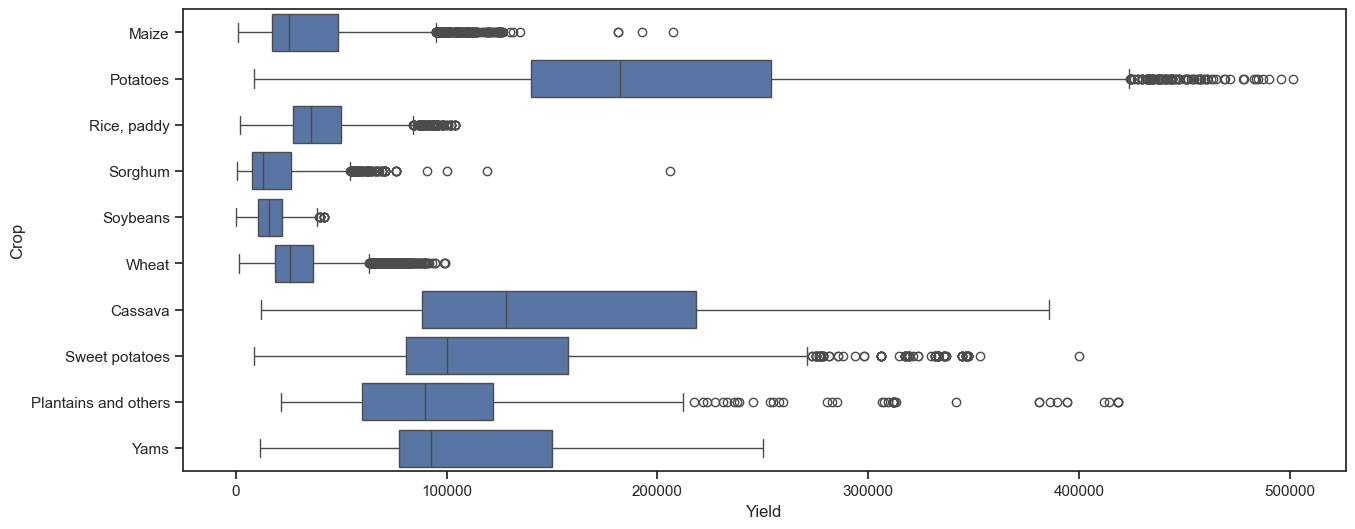

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(y='Crop', x='Yield', data=df) # check the outliers in the yield column
plt.show()

---

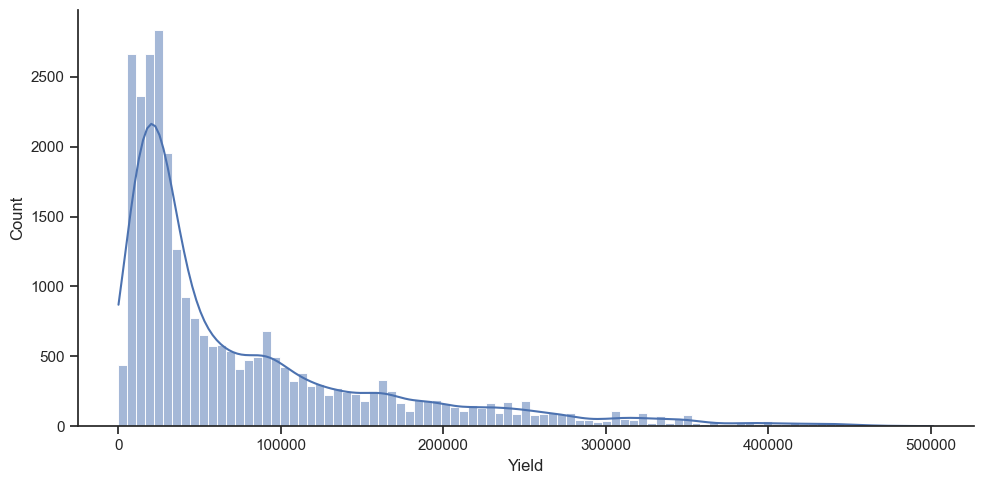

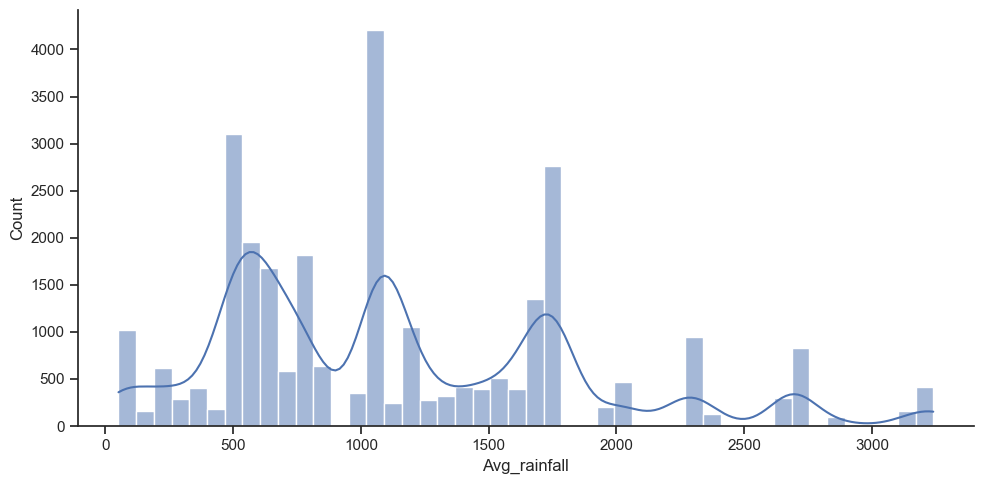

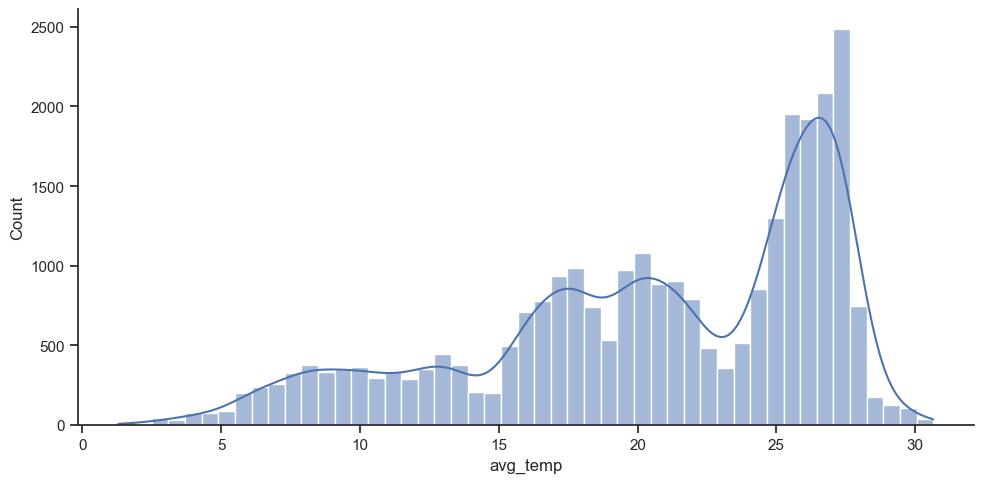

In [18]:
# plot the distribution of Yield, Avg_rainfall and avg_temp
for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    sns.displot(df[col], kde='true',aspect=2)
plt.show()

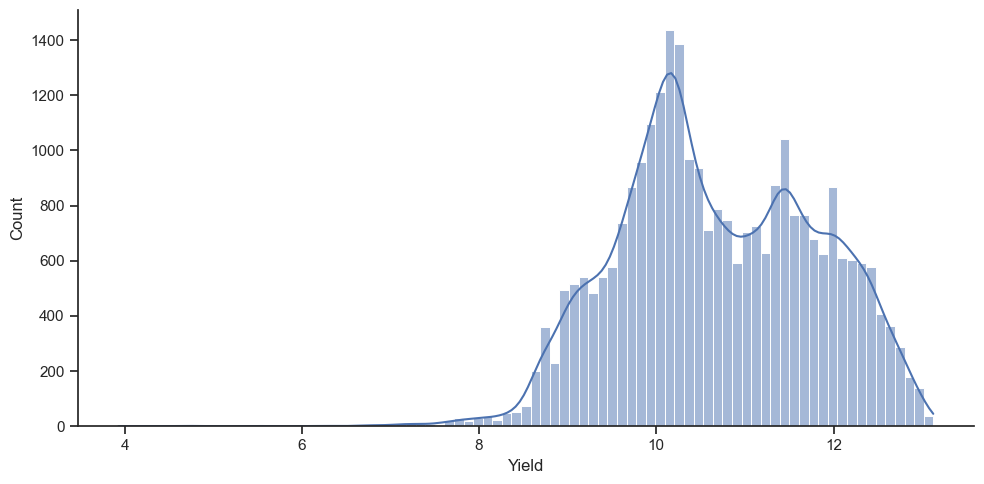

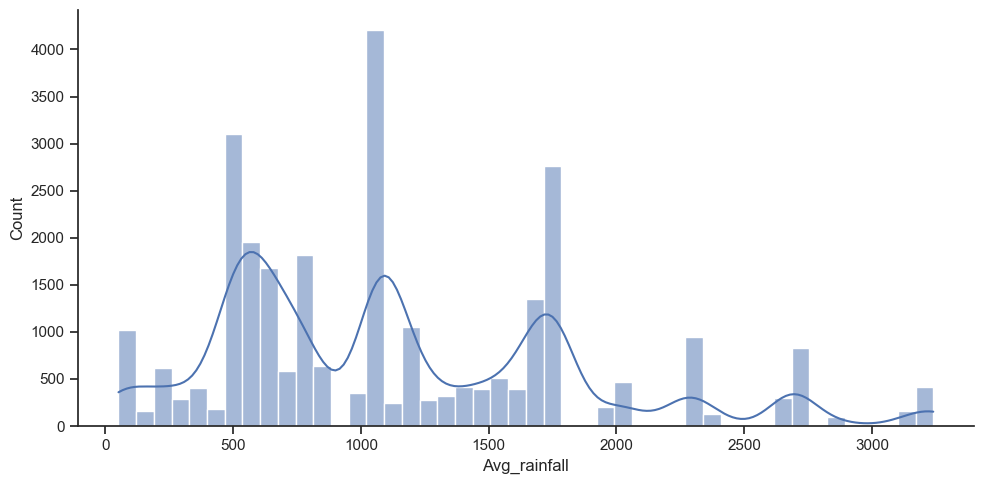

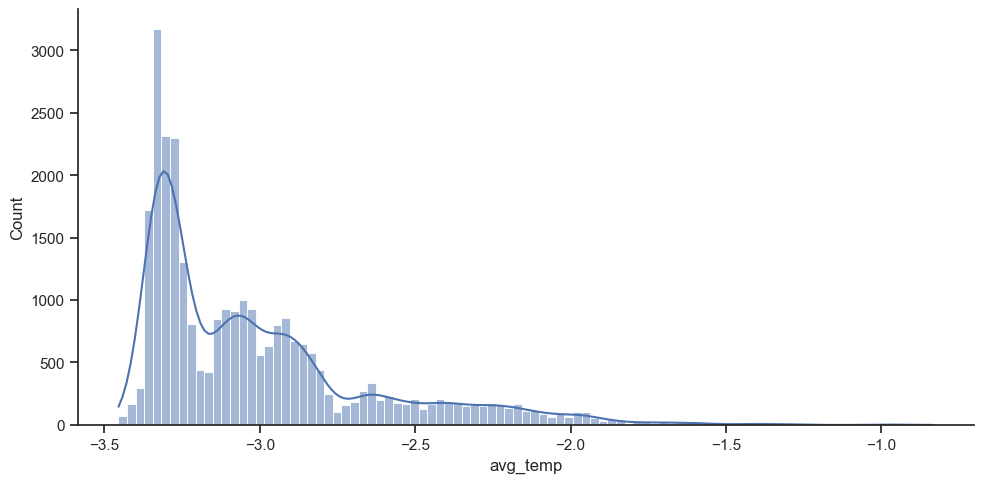

In [19]:
# transform the yield column using log transformation to reduce the skewness
df['Yield'] = np.log1p(df['Yield'])
df['avg_temp']= -1 * (np.log1p(df['avg_temp']))

# plot the distribution of Yield, Avg_rainfall and avg_temp after log transformation
for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    sns.displot(df[col], kde='true',aspect=2)
plt.show()

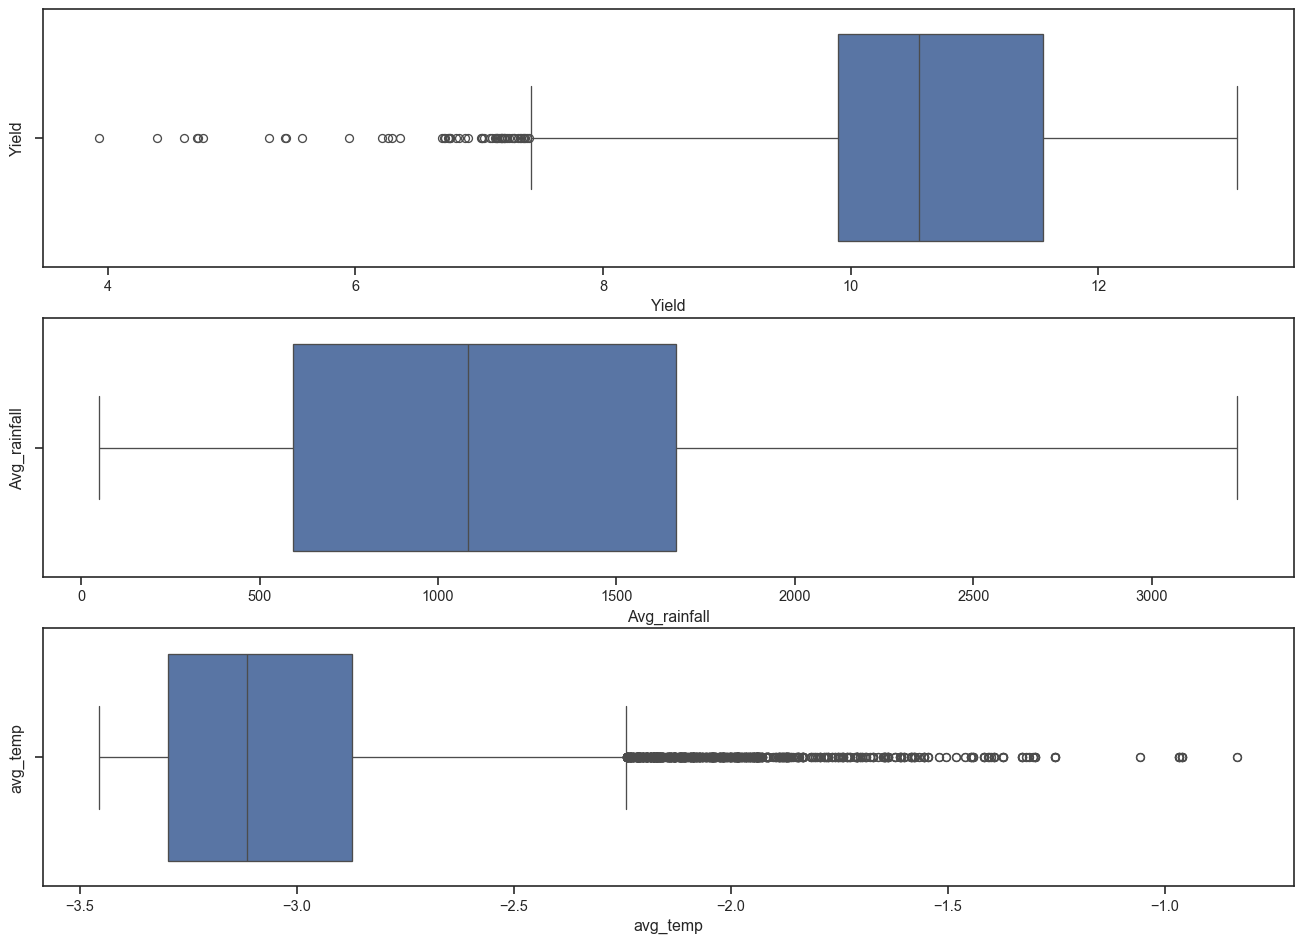

In [20]:
# plot the boxplot of Yield, Avg_rainfall and avg_temp to check for outliers

fig, axs = plt.subplots(3, 1, dpi=95, figsize=(17, 12))
i = 0
for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_ylabel(col)
    i += 1
plt.show()

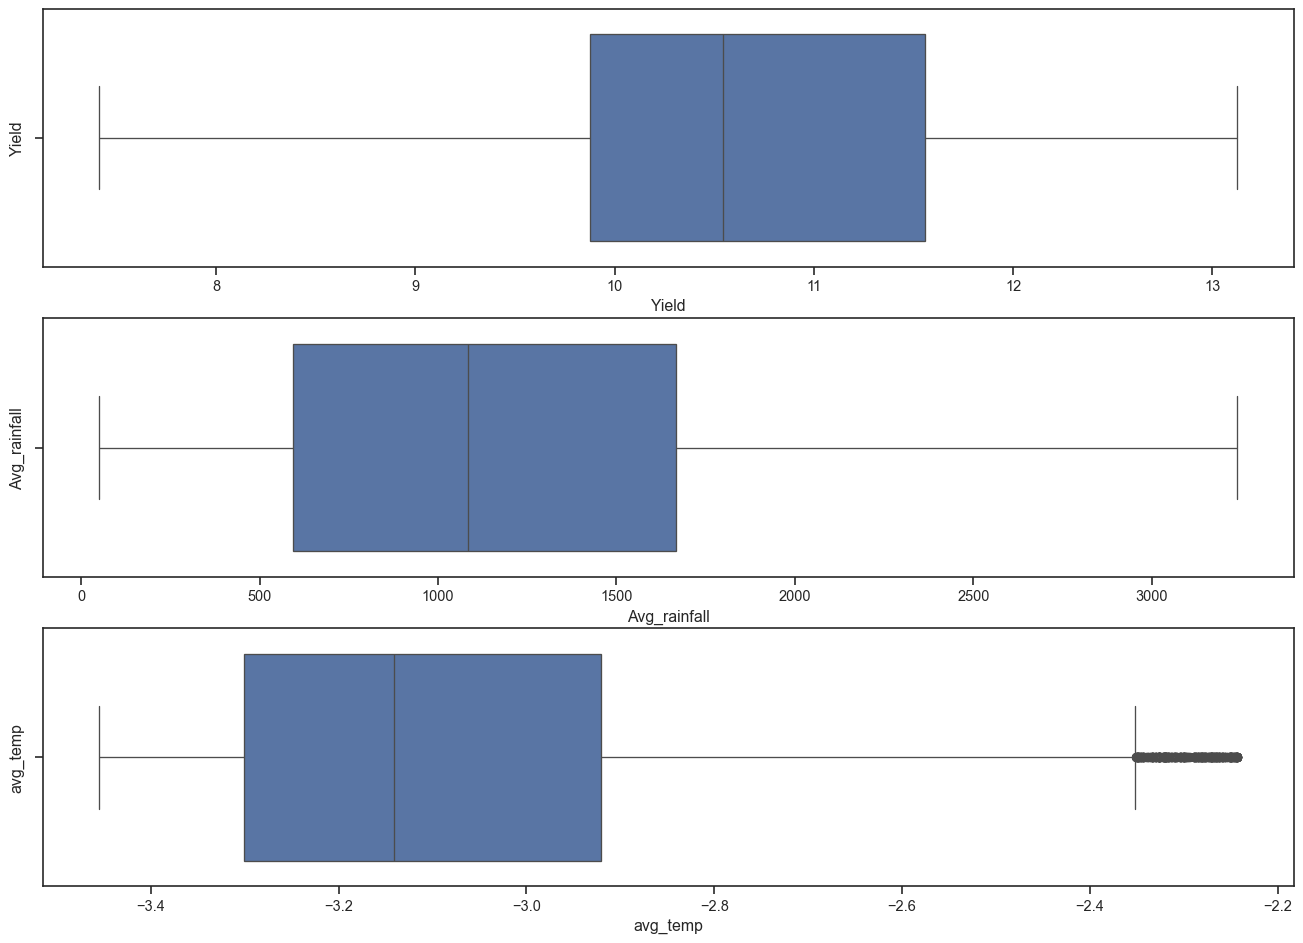

In [21]:
# remove the outliers in the Yield, Avg_rainfall and avg_temp columns

for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# bbox-plots
fig, axs = plt.subplots(3, 1, dpi=95, figsize=(17, 12))
i = 0
for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# scale the Yield, Avg_rainfall and avg_temp columns using RobustScaler and StandardScaler 
robust_scaler = RobustScaler()
df['Yield'] = robust_scaler.fit_transform(df[['Yield']])

scaler = StandardScaler()
for col in ['Avg_rainfall', 'avg_temp']:
    df[col] = scaler.fit_transform(df[[col]])

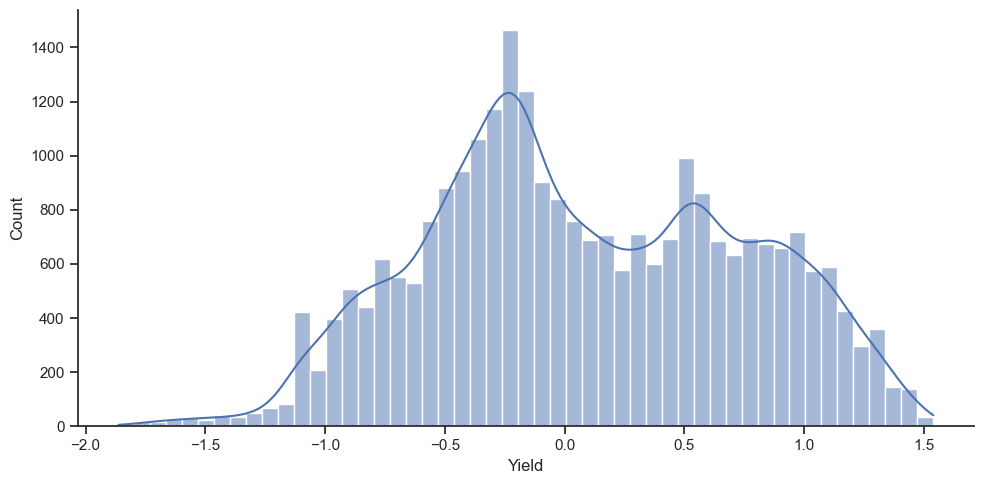

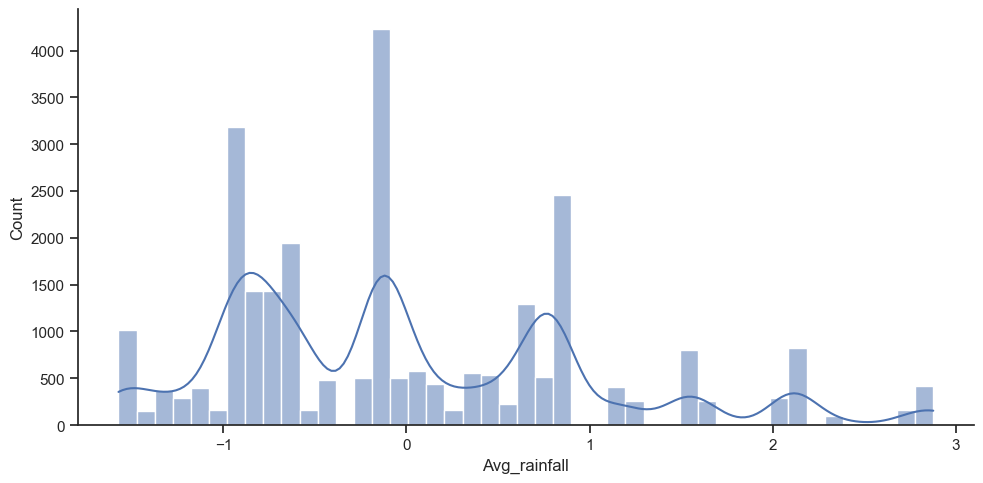

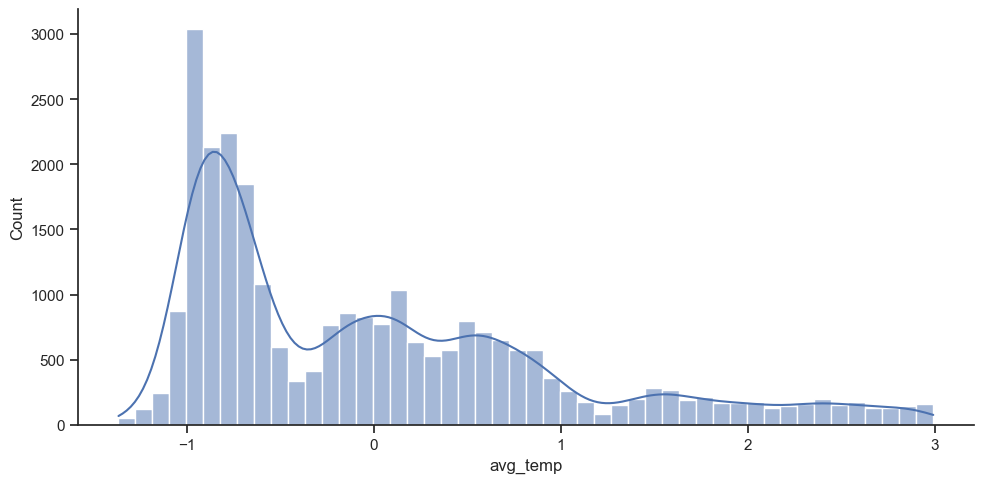

In [23]:
# plot the distribution of Yield, Avg_rainfall and avg_temp after scaling
for col in ['Yield', 'Avg_rainfall', 'avg_temp']:
    sns.displot(df[col], kde='true',aspect=2)
plt.show()

In [24]:
# encode the Crop column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df.head()

,Country,Crop,Year,Yield,Avg_rainfall,avg_temp
0,0,1,1990,-0.019822,0.42834,0.792109
1,0,3,1990,0.337137,0.42834,0.792109
2,0,4,1990,-0.288166,0.42834,0.792109
3,0,5,1990,-0.659902,0.42834,0.792109
4,0,6,1990,-1.005224,0.42834,0.792109


In [25]:
# drop column as it is not needed for the model
df.drop(['Year'],axis=1,inplace=True)

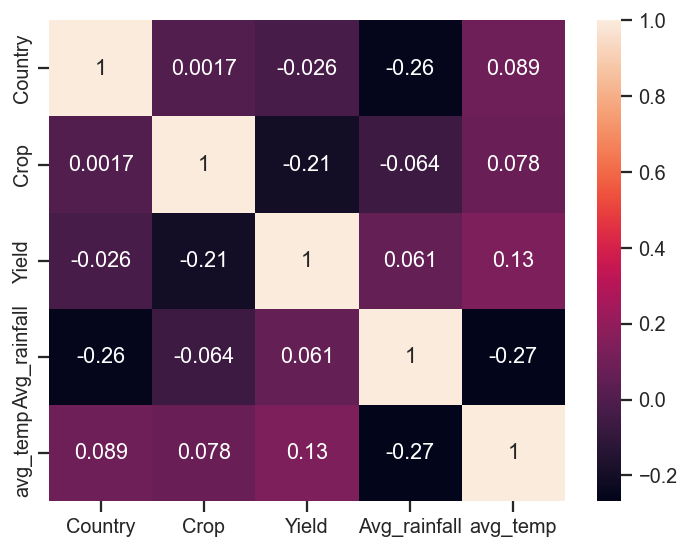

In [26]:
# check the correlation between the variables using heatmap
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X=df.drop(['Yield'],axis=1) # features
y=df['Yield'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [28]:
print(X.shape)
print(y.shape)

(26534, 4)
(26534,)


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import PredictionErrorDisplay

In [30]:
# fit the model using DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

Decision Tree Regressor
Mean Squared Error:  0.03168502839127978
R2 score:  0.9281171429462074
Accuracy:  92.81171429462074


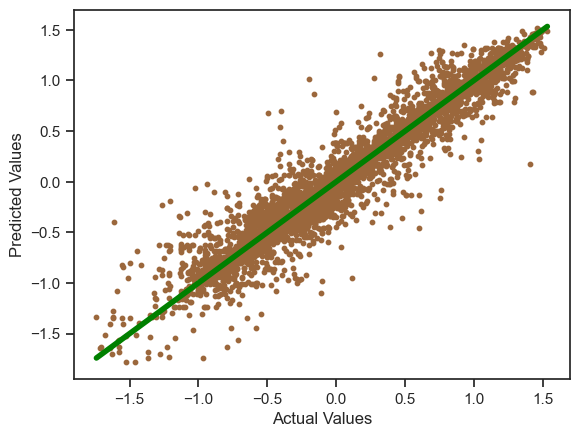

In [31]:
dtree_pred = dtree.predict(X_test) # predict the yield

# evaluate the model using mean_squared_error, r2_score and accuracy
print('Decision Tree Regressor')
print('Mean Squared Error: ',mean_squared_error(y_test,dtree_pred))
print('R2 score: ',r2_score(y_test,dtree_pred))
print('Accuracy: ',dtree.score(X_test,y_test)*100)

# plot the actual vs predicted values using scatter plot
plt.scatter(y_test, dtree_pred,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()


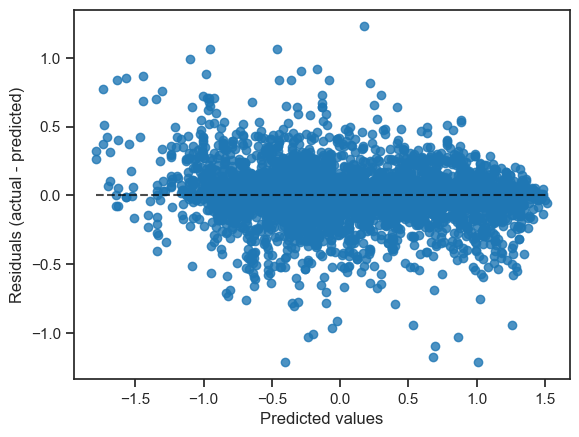

In [32]:
# evaluate the model predictions using PredictionErrorDisplay 
error_display = PredictionErrorDisplay(y_true=y_test, y_pred=dtree_pred)

error_display.plot()
plt.show()

In [33]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # get 1000 random row
# df_sample = df.sample(n=500, random_state=10)
# X1 = df_sample.drop(['Yield'], axis=1)
# y1 = df_sample['Yield']

# # Define the parameter grid
# param_grid = {
#     'C': [1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Create the SVM model
# svm_model = SVR()

# # Perform grid search
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
# grid_search.fit(X1, y1)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [34]:
model = SVR(C=10, gamma='auto', kernel='rbf') # fit the model using the best parameters
model.fit(X_train, y_train) # fit the model using the training data

SVR(C=10, gamma='auto')

In [35]:
svr_pred = model.predict(X_test) # predict the yield

# evaluate the model using mean_squared_error, r2_score and accuracy
mse = mean_squared_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)
accuracy = model.score(X_test, y_test) * 100

Support Vector Machine (Linear Regression)
Mean Squared Error: 0.02207700662910828
R2 score: 0.9499145687326391
Accuracy: 94.99145687326391


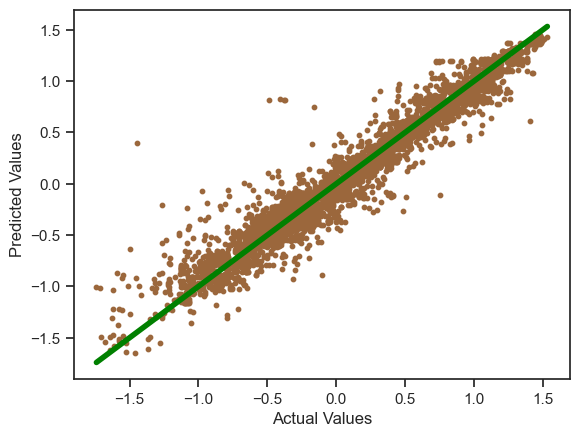

In [36]:
# print the evaluation metrics
print("Support Vector Machine (Linear Regression)")
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Accuracy:", accuracy)

# plot the actual vs predicted values using scatter plot
plt.scatter(y_test, svr_pred,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

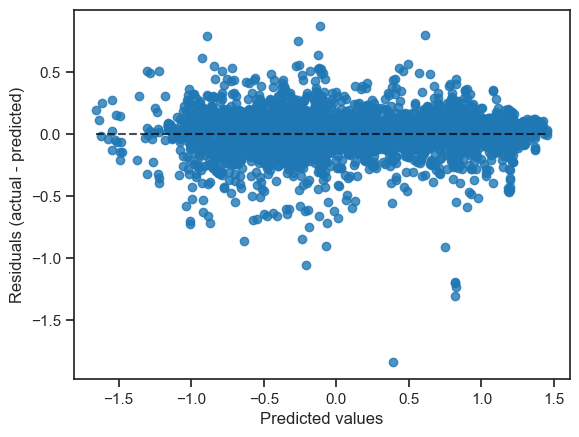

In [37]:
error_display = PredictionErrorDisplay(y_true=y_test, y_pred=svr_pred) # evaluate the model predictions using PredictionErrorDisplay 

# plot the error display
error_display.plot()
plt.show()

Decision Tree Regressor:
Mean Squared Error: 0.03168502839127978
R2 score: 0.9281171429462074

SVR:
Mean Squared Error: 0.02207700662910828
R2 score: 0.9499145687326391


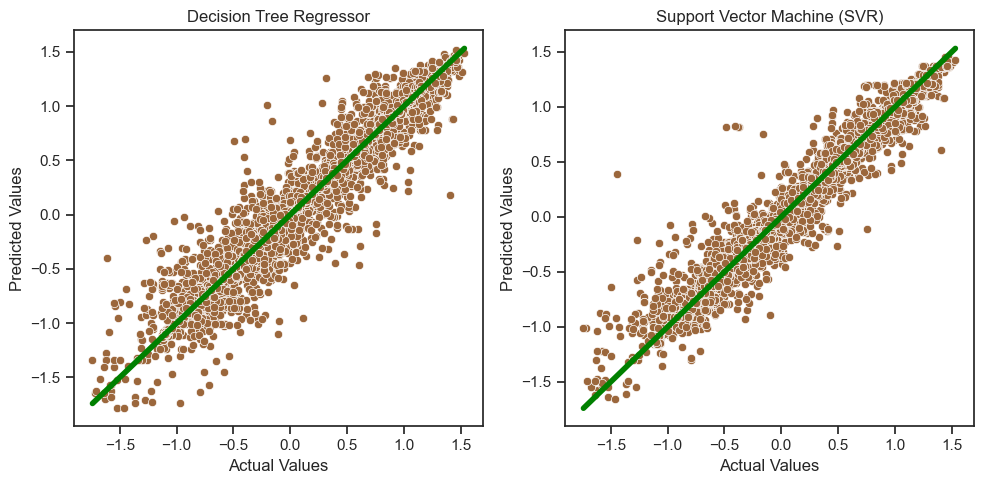

In [38]:
# Decision Tree Regressor
dtree_predictions = dtree.predict(X_test)
dtree_mse = mean_squared_error(y_test, dtree_predictions)
dtree_r2 = r2_score(y_test, dtree_predictions)

# SVR
svr_predictions = model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Print the performance metrics
print("Decision Tree Regressor:")
print("Mean Squared Error:", dtree_mse)
print("R2 score:", dtree_r2)
print("\nSVR:")
print("Mean Squared Error:", svr_mse)
print("R2 score:", svr_r2)

# Plot the performance metrics
plt.figure(figsize=(10, 5))

# Decision Tree Regressor
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=dtree_predictions, color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)

# SVR
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=svr_predictions, color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Machine (SVR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)

plt.tight_layout()
plt.show()


In [42]:
# Evaluate overfitting for Decision Tree Regressor
dtree_train_pred = dtree.predict(X_train)
dtree_test_pred = dtree.predict(X_test)

dtree_train_r2 = r2_score(y_train, dtree_train_pred)
dtree_test_r2 = r2_score(y_test, dtree_test_pred)

print("Decision Tree Regressor:")
print("Train R2 score:", dtree_train_r2)
print("Test R2 score:", dtree_test_r2)

# Evaluate overfitting for SVR
svr_train_pred = model.predict(X_train)
svr_test_pred = model.predict(X_test)

svr_train_r2 = r2_score(y_train, svr_train_pred)
svr_test_r2 = r2_score(y_test, svr_test_pred)

print("\nSupport Vector Machine (SVR):")
print("Train R2 score:", svr_train_r2)
print("Test R2 score:", svr_test_r2)


Decision Tree Regressor:
Train R2 score: 0.9960610401760419
Test R2 score: 0.9281171429462074

Support Vector Machine (SVR):
Train R2 score: 0.9581408847570734
Test R2 score: 0.9499145687326391


Decision Tree Regressor:
	Mean Squared Error:	 0.0317
	Mean Absolute Error:	 0.1092
	R2 score:		 0.9281
	Explained Variance Score:0.9281
	Mean Pinball Loss:	 0.0546
	D2 Pinball Score:	 0.8054
	D2 Absolute Error Score: 0.8054

SVR:
	Mean Squared Error:	 0.0221
	Mean Absolute Error:	 0.1012
	R2 score:		 0.9499
	Explained Variance Score:0.9499
	Mean Pinball Loss:	 0.0506
	D2 Pinball Score:	 0.8197
	D2 Absolute Error Score: 0.8197


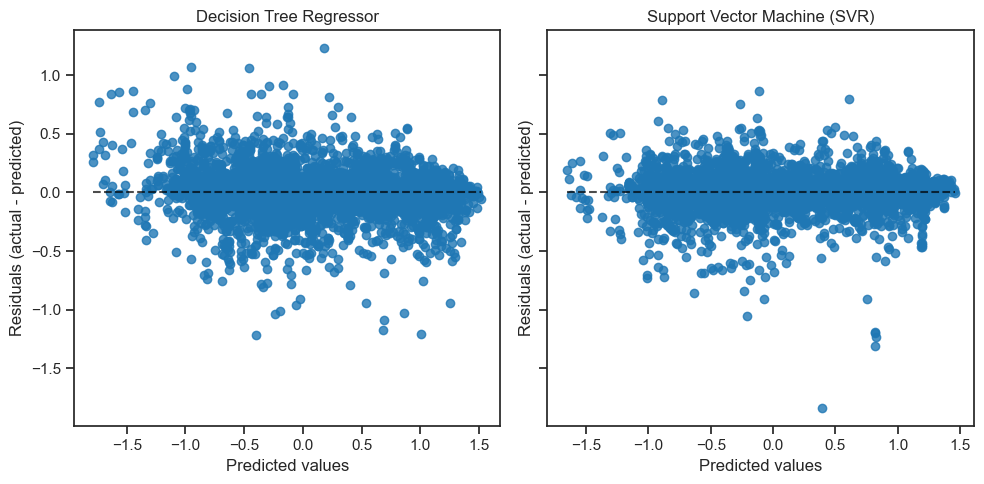

In [40]:
from sklearn.metrics import mean_squared_error,median_absolute_error, mean_absolute_error, r2_score, explained_variance_score, mean_pinball_loss, d2_pinball_score, d2_absolute_error_score, PredictionErrorDisplay

# dtree
dtree_mse = mean_squared_error(y_test, dtree_predictions)
dtree_mae = mean_absolute_error(y_test, dtree_predictions)
dtree_r2 = r2_score(y_test, dtree_predictions)
dtree_ev = explained_variance_score(y_test, dtree_predictions)
dtree_mp = mean_pinball_loss(y_test, dtree_predictions)
dtree_d2p = d2_pinball_score(y_test, dtree_predictions)
dtree_d2a = d2_absolute_error_score(y_test, dtree_predictions)

# svr
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
svr_ev = explained_variance_score(y_test, svr_predictions)
svr_mp = mean_pinball_loss(y_test, svr_predictions)
svr_d2p = d2_pinball_score(y_test, svr_predictions) 
svr_d2a = d2_absolute_error_score(y_test, svr_predictions)

# Print the performance metrics
print("Decision Tree Regressor:")
print("\tMean Squared Error:\t {:.4f}".format(dtree_mse))
print("\tMean Absolute Error:\t {:.4f}".format(dtree_mae))
print("\tR2 score:\t\t {:.4f}".format(dtree_r2))
print("\tExplained Variance Score:{:.4f}".format(dtree_ev))
print("\tMean Pinball Loss:\t {:.4f}".format(dtree_mp))
print("\tD2 Pinball Score:\t {:.4f}".format(dtree_d2p))
print("\tD2 Absolute Error Score: {:.4f}".format(dtree_d2a))
print("\nSVR:")
print("\tMean Squared Error:\t {:.4f}".format(svr_mse))
print("\tMean Absolute Error:\t {:.4f}".format(svr_mae))
print("\tR2 score:\t\t {:.4f}".format(svr_r2))
print("\tExplained Variance Score:{:.4f}".format(svr_ev))
print("\tMean Pinball Loss:\t {:.4f}".format(svr_mp))
print("\tD2 Pinball Score:\t {:.4f}".format(svr_d2p))
print("\tD2 Absolute Error Score: {:.4f}".format(svr_d2a))

f, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

# Decision Tree Regressor
error_display = PredictionErrorDisplay(y_true=y_test, y_pred=dtree_predictions)
error_display.plot(ax=ax0)
ax0.set_title("Decision Tree Regressor")

# SVR
error_display = PredictionErrorDisplay(y_true=y_test, y_pred=svr_predictions)
error_display.plot(ax=ax1)
ax1.set_title("Support Vector Machine (SVR)")

plt.tight_layout()
plt.show()
